In [1]:
!pip install librosa

In [2]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('ravdess/Actor_01/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ria Jha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


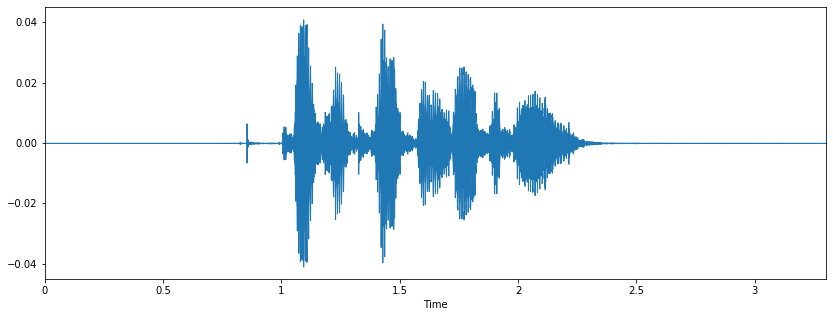

In [3]:
%pylab inline
import os
import pandas as pd
import glob

plt.figure(figsize=(14,5))
librosa.display.waveplot(data, sr = sampling_rate)

In [4]:
path = 'ravdess'
lst = []

for subdir,dirs,files in os.walk(path):
    for file in files:
        try:
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            file = int(file[7:8]) - 1
            arr = mfccs, file
            lst.append(arr)
        except ValueError:
            continue

# Feature Extraction and Plotting for the distribution of the important features

In [5]:
# Feature Extraction and Model fitting

In [6]:
X, Y = zip(*lst)

In [7]:
import numpy as np
X_ary = np.asarray(X)
Y_ary = np.asarray(Y)

X_ary.shape, Y_ary.shape

((1440, 40), (1440,))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

x_train, x_test, y_train, y_test = train_test_split(X_ary, Y_ary, test_size=0.33) 

In [9]:
#SelectFromModel will select those features more important than the value of all features automatically, 
#but we can change this limit if we want.
#To see which key features we can use the get_support method in the embedded model.

In [10]:
sel = SelectFromModel(RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", max_leaf_nodes=100, min_samples_leaf=3, min_samples_split=20, n_estimators= 22000, random_state=5))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features='log2',
                                                 max_leaf_nodes=100,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=3,
                                                 min_samples_split=20,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=22000,
                                                 n_jobs=None, oob_score=False,
                                                 random_state=5, verbose=0,
                                                 warm_

In [11]:
sel.get_support()
list1 = list(sel.get_support())
col = x_train[0]
imp_feat= col[(sel.get_support())]
print(len(imp_feat))
print(imp_feat)

12
[-557.60297     57.896145   -20.640697     8.217706   -15.416168
   -1.040577    -4.7249694  -12.07824     -0.8256193   -6.998331
   -3.1664963   -5.1125016]


In [12]:
#Histogram for the Distribution of feature importances, x-axis representing the importance value/score of a feature and 
#y-axis will represent the feature

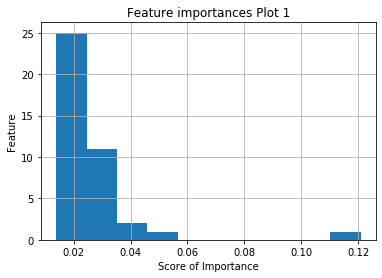

In [13]:
plt.title("Feature importances Plot 1")
plt.xlabel("Score of Importance")
plt.ylabel("Feature")
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [14]:
#Second method for feature extraction, Higher the score more will be importance

In [15]:
rfc = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", max_leaf_nodes=100, min_samples_leaf=3, min_samples_split=20, n_estimators= 22000, random_state=5)
rfc.fit(x_train,y_train)
rfc.feature_importances_
fd = pd.DataFrame({"Features": col, "Importance" : list(rfc.feature_importances_)})
print("High Score -> More Important Feature")
fd.sort_values(["Importance"],ascending = False)

High Score -> More Important Feature


,Features,Importance
0,-557.602966,0.120890
1,57.896145,0.047847
2,-20.640697,0.040667
4,-15.416168,0.036962
5,-1.040577,0.032268
21,-5.112502,0.030986
7,-12.078240,0.026749
10,-0.825619,0.026711
20,-3.166496,0.026290
15,-6.998331,0.025834


In [16]:
#Ploting for distrbution of feature importance, x-axis repsenting the features and y-axis reprsenting the importance

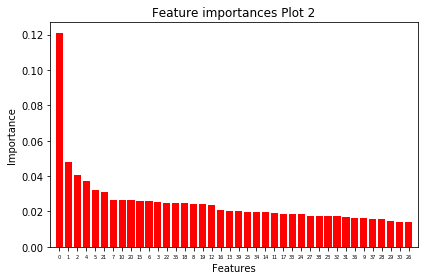

In [17]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1] 
plt.figure()
plt.title("Feature importances Plot 2")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.bar(range(x_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.tick_params(axis='x', which='major', labelsize=5)
plt.tight_layout()
plt.show()

In [18]:
#Plot for importance features for classification the most important feature is represented by the highest score, 
#y-axis representing the score

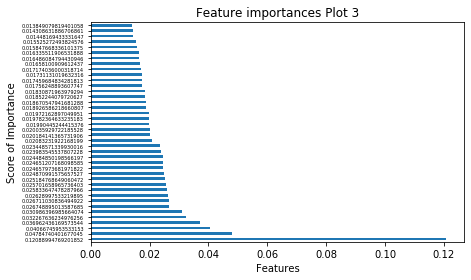

In [19]:
plt.title("Feature importances Plot 3")
plt.ylabel("Score of Importance")
plt.xlabel("Features")
plt.tick_params(axis='y', which='major', labelsize=5)
plt.tight_layout()
feat_importances = pd.Series(rfc.feature_importances_, index=sel.estimator_.feature_importances_.ravel())
feat_importances.nlargest(40).plot(kind='barh')

In [20]:
#Third Method to determine whether the categorical feature is important or not

In [21]:
sel_feat = pd.DataFrame({"Features": col, "Importance" : list1 })
print("True value will represent an important feature")
sel_feat.sort_values(["Importance"],ascending = False)

True value will represent an important feature


,Features,Importance
0,-557.602966,True
7,-12.078240,True
21,-5.112502,True
1,57.896145,True
15,-6.998331,True
10,-0.825619,True
20,-3.166496,True
6,-4.724969,True
5,-1.040577,True
2,-20.640697,True


In [22]:
#Plot for the categorial feature, whether its important or not

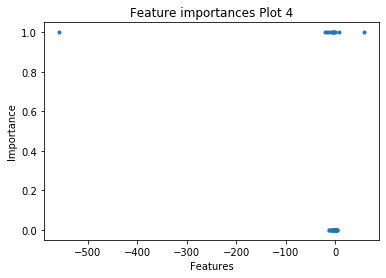

In [23]:
plt.title("Feature importances Plot 4")
plt.xlabel("Features")
plt.ylabel("Importance")
xr = sel_feat["Features"]
yr = sel_feat["Importance"]
plt.plot(xr,yr,'.')